# Support Vector Machines

### 1. Loading of the data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [3]:
mat = loadmat("ex6data1.mat") # X,y로 구성
X = mat["X"] # 51x2
y = mat["y"] # 51x1

### 2. plotting the data

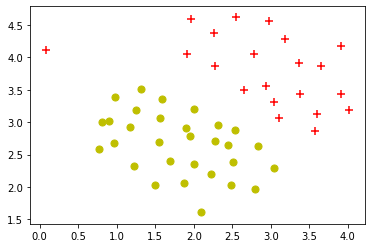

In [4]:
m, n = X.shape[0], X.shape[1] #51, 2

# true, false로 구성
# 주어진 데이터만 사용할 경우 reshape는 필요없음
# positive 51x1, negative 51x1 
pos, neg = (y==1).reshape(m,1), (y==0).reshape(m,1)

# + : y==1 / o : y==0
plt.scatter(X[pos[:,0],0], X[pos[:,0],1], c="r", marker="+", s=50)
plt.scatter(X[neg[:,0],0], X[neg[:,0],1], c="y", marker="o", s=50)

### 3. Using support vector machines

In [5]:
def sigmoid(z) :
    return 1 / (1 + np.exp(-z))

In [6]:
def cost(C, theta, X, y):
    y = y[:,np.newaxis]
    predictions = sigmoid(X@theta)
    cost = C * (y * cost1(predictions) + (1-y) * cost0(predictions)) + 1/2 * sum(theta**2)
    return cost

In [7]:
def cost1(predictions) :
    cost1 = 10
    if predictions >= 1 :
        cost1 = 0
    else :
        cost1 = -0.5*predictions + 0.5
    return cost1

In [8]:
def cost0(predictions) :
    cost0 = 10
    if predictions <= -1 :
        cost0 = 0
    else :
        cost0 = 0.5*predictions + 0.5
    return cost0

### 4-1. SVM with linear kernels
- test1 : small c, 1
- test2 : large c, 100

In [9]:
from sklearn.svm import SVC
classifier = SVC(kernel = "linear")
classifier.fit(X, np.ravel(y))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### Visualising the Training set results

C:\Users\Moon\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: No contour levels were found within the data range.
  # Remove the CWD from sys.path while we load stuff.


(1.5, 5)

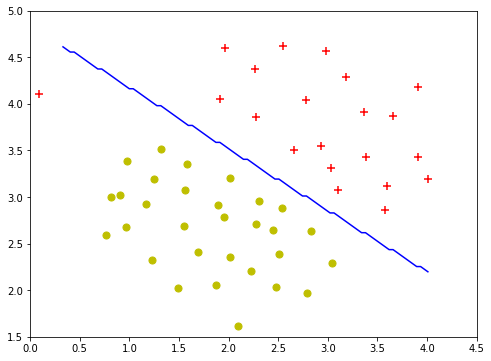

In [11]:
plt.figure(figsize=(8,6))

plt.scatter(X[pos[:,0],0], X[pos[:,0],1], c="r", marker="+", s=50)
plt.scatter(X[neg[:,0],0], X[neg[:,0],1], c="y", marker="o", s=50)

# np.linspace(X[:,0].min(),X[:,1].max(),num=100 : 0열의 최소 ~ 1열의 최대, 100개

X_1,X_2 = np.meshgrid(np.linspace(X[:,0].min(),X[:,0].max(),num=100),np.linspace(X[:,1].min(),X[:,1].max(),num=100))

plt.contour(X_1,X_2,classifier.predict(np.array([X_1.ravel(),X_2.ravel()]).T).reshape(X_1.shape),0,colors="b")
plt.xlim(0,4.5)
plt.ylim(1.5,5)

- 위와 contour level만 다름

(1.5, 5)

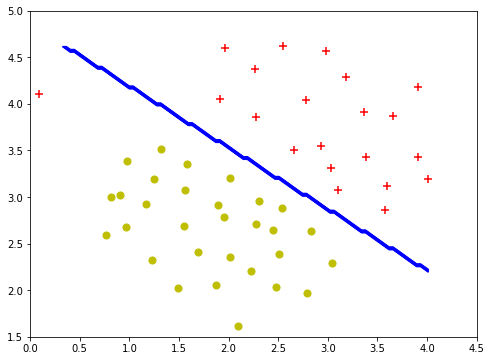

In [21]:
plt.figure(figsize=(8,6))

plt.scatter(X[pos[:,0],0], X[pos[:,0],1], c="r", marker="+", s=50)
plt.scatter(X[neg[:,0],0], X[neg[:,0],1], c="y", marker="o", s=50)

# np.linspace(X[:,0].min(),X[:,1].max(),num=100 : 0열의 최소 ~ 1열의 최대, 100개

X_1,X_2 = np.meshgrid(np.linspace(X[:,0].min(),X[:,0].max(),num=100),np.linspace(X[:,1].min(),X[:,1].max(),num=100))

plt.contour(X_1,X_2,classifier.predict(np.array([X_1.ravel(),X_2.ravel()]).T).reshape(X_1.shape),10,colors="b")
plt.xlim(0,4.5)
plt.ylim(1.5,5)

In [12]:
# Test C = 100
classifier2 = SVC(C=100,kernel="linear")
classifier2.fit(X,np.ravel(y))

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

C:\Users\Moon\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: No contour levels were found within the data range.
  import sys


(1.5, 5)

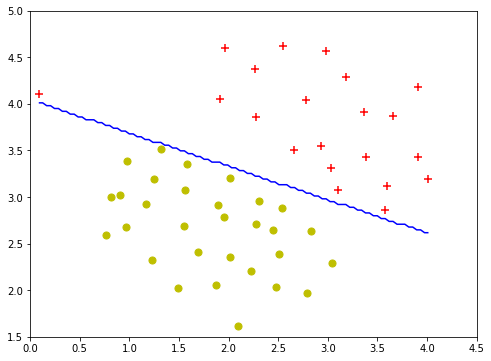

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+",s=50)
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="y",marker="o",s=50)

# plotting the decision boundary
X_3,X_4 = np.meshgrid(np.linspace(X[:,0].min(),X[:,0].max(),num=100),np.linspace(X[:,1].min(),X[:,1].max(),num=100))
plt.contour(X_3,X_4,classifier2.predict(np.array([X_3.ravel(),X_4.ravel()]).T).reshape(X_3.shape),0,colors="b")
plt.xlim(0,4.5)
plt.ylim(1.5,5)

### 4-2-1. SVM with gaussian kernels
- test1 : small c, 1
- test2 : large c, 100

In [14]:
mat2 = loadmat("ex6data2.mat") # X,y로 구성
X2 = mat2["X"] # 863x2
y2 = mat2["y"] # 863x1

### plotting the data

(0.4, 1)

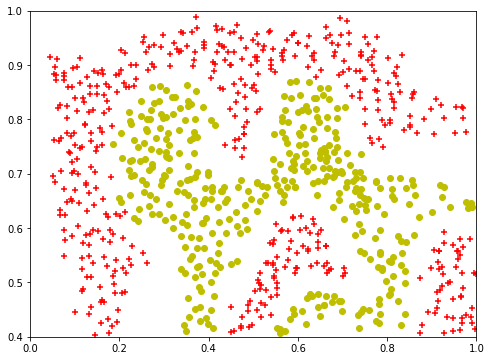

In [15]:
m2, n2 = X2.shape[0], X2.shape[1] # 863, 2

# positive, negative
# true, false로 이루어짐
# 863x1
pos2,neg2= (y2==1).reshape(m2,1), (y2==0).reshape(m2,1)

plt.figure(figsize=(8,6))
plt.scatter(X2[pos2[:,0],0],X2[pos2[:,0],1],c="r",marker="+")
plt.scatter(X2[neg2[:,0],0],X2[neg2[:,0],1],c="y",marker="o")
# 구간
plt.xlim(0,1)
plt.ylim(0.4,1)

In [16]:
classifier3 = SVC(kernel="rbf",gamma=30)
classifier3.fit(X2,y2.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=30, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### visualising the decision boundary

C:\Users\Moon\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: No contour levels were found within the data range.
  


(0.4, 1)

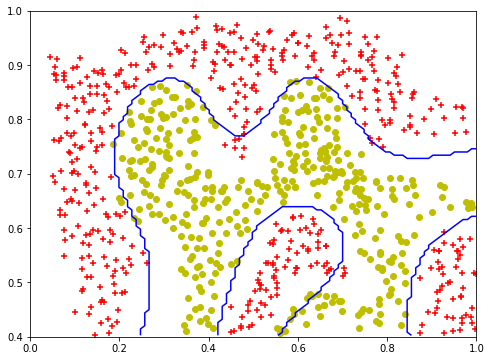

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(X2[pos2[:,0],0],X2[pos2[:,0],1],c="r",marker="+")
plt.scatter(X2[neg2[:,0],0],X2[neg2[:,0],1],c="y",marker="o")


# plotting the decision boundary
X_5,X_6 = np.meshgrid(np.linspace(X2[:,0].min(),X2[:,0].max(),num=100),np.linspace(X2[:,1].min(),X2[:,1].max(),num=100))
plt.contour(X_5,X_6,classifier3.predict(np.array([X_5.ravel(),X_6.ravel()]).T).reshape(X_5.shape),0,colors="b")
plt.xlim(0,1)
plt.ylim(0.4,1)

In [18]:
classifier4 = SVC(C=100,kernel="rbf",gamma=30)
classifier4.fit(X2,y2.ravel())

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=30, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

C:\Users\Moon\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: No contour levels were found within the data range.
  


(0.4, 1)

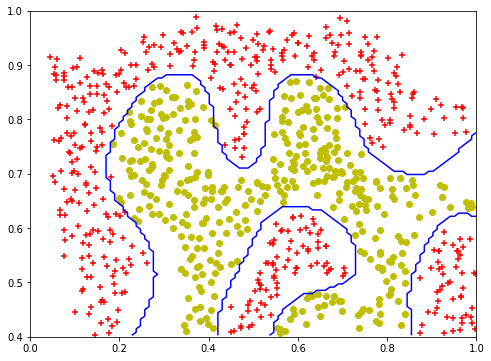

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(X2[pos2[:,0],0],X2[pos2[:,0],1],c="r",marker="+")
plt.scatter(X2[neg2[:,0],0],X2[neg2[:,0],1],c="y",marker="o")


# plotting the decision boundary
X_7,X_8 = np.meshgrid(np.linspace(X2[:,0].min(),X2[:,0].max(),num=100),np.linspace(X2[:,1].min(),X2[:,1].max(),num=100))
plt.contour(X_7,X_8,classifier4.predict(np.array([X_7.ravel(),X_8.ravel()]).T).reshape(X_7.shape),0,colors="b")
plt.xlim(0,1)
plt.ylim(0.4,1)

### 4-2-2. Dataset3

In [20]:
mat3 = loadmat("ex6data3.mat")
X3 = mat3["X"] # 211x2
y3 = mat3["y"] # 211x1
Xval = mat3["Xval"] # 200x2
yval = mat3["yval"] # 200x1

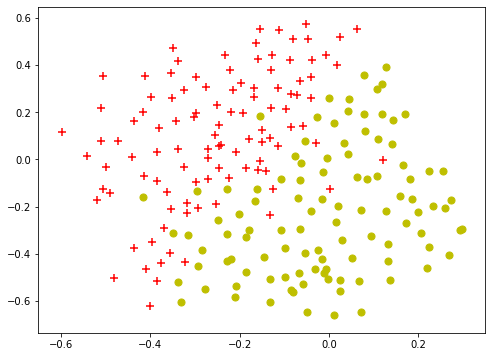

In [21]:
m3,n3 = X3.shape[0],X3.shape[1] # 211, 2

# positive, negative
# true, false
# 211x1
pos3,neg3= (y3==1).reshape(m3,1), (y3==0).reshape(m3,1)

plt.figure(figsize=(8,6))
plt.scatter(X3[pos3[:,0],0],X3[pos3[:,0],1],c="r",marker="+",s=50)
plt.scatter(X3[neg3[:,0],0],X3[neg3[:,0],1],c="y",marker="o",s=50)

### Hyperparameter tuning

In [22]:
def dataset3Params(X, y, Xval, yval, vals) :
    acc = 0
    best_c=0
    best_gamma=0
    
    for i in vals:
        C= i
        for j in vals:
            gamma = 1/j
            classifier = SVC(C=C,gamma=gamma)
            classifier.fit(X,y)
            #prediction = classifier.predict(Xval)
            score = classifier.score(Xval,yval)
            if score>acc:
                acc =score
                best_c =C
                best_gamma=gamma
    return best_c, best_gamma

In [23]:
vals = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
C, gamma = dataset3Params(X3, y3.ravel(), Xval, yval.ravel(),vals)
classifier5 = SVC(C=C,gamma=gamma)
classifier5.fit(X3,y3.ravel())

SVC(C=0.3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100.0, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### plotting the decision boundary

C:\Users\Moon\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: No contour levels were found within the data range.
  import sys


(-0.7, 0.5)

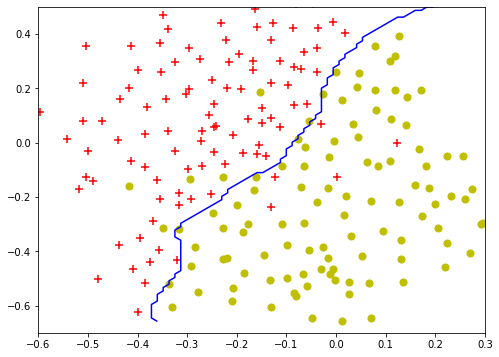

In [24]:
plt.figure(figsize=(8,6))
plt.scatter(X3[pos3[:,0],0],X3[pos3[:,0],1],c="r",marker="+",s=50)
plt.scatter(X3[neg3[:,0],0],X3[neg3[:,0],1],c="y",marker="o",s=50)

# plotting the decision boundary
X_9,X_10 = np.meshgrid(np.linspace(X3[:,0].min(),X3[:,1].max(),num=100),np.linspace(X3[:,1].min(),X3[:,1].max(),num=100))
plt.contour(X_9,X_10,classifier5.predict(np.array([X_9.ravel(),X_10.ravel()]).T).reshape(X_9.shape),0,colors="b")
plt.xlim(-0.6,0.3)
plt.ylim(-0.7,0.5)

### 5. spam classification

In [22]:
import re #정규표현식 regular expression
from nltk.stem import PorterStemmer #어간추출, 정해진 규칙으로 단어의 어미를 자름

In [23]:
# 읽기 모드
file_contents = open("emailSample1.txt", "r").read()
vocabList = open("vocab.txt", "r").read()

In [25]:
vocabList=vocabList.split("\n")[:-1]

In [26]:
len(vocabList)

1898

In [32]:
# 딕셔너리
vocabList_d={}
for ea in vocabList:
    key,value = ea.split("\t")[:]
    vocabList_d[value] = key

In [33]:
file_contents

"> Anyone knows how much it costs to host a web portal ?\n>\nWell, it depends on how many visitors you're expecting.\nThis can be anywhere from less than 10 bucks a month to a couple of $100. \nYou should checkout http://www.rackspace.com/ or perhaps Amazon EC2 \nif youre running something big..\n\nTo unsubscribe yourself from this mailing list, send an email to:\ngroupname-unsubscribe@egroups.com\n"

### 6. preprocessing emails

In [38]:
def processEmail(email_contents,vocabList_d):
   
    # 소문자로
    email_contents = email_contents.lower()
    
    # sub : 바꾸기
    email_contents = re.sub("[0-9]+","number",email_contents)
    # 주소
    email_contents = re.sub("[http|https]://[^\s]*","httpaddr",email_contents)
    # 이메일 주소
    email_contents = re.sub("[^\s]+@[^\s]+","emailaddr",email_contents)
    # $ 
    email_contents = re.sub("[$]+","dollar",email_contents)
    
    # 특수문자 -> ""
    specialChar = ["<","[","^",">","+","?","!","'",".",",",":"]
    for char in specialChar:
        email_contents = email_contents.replace(str(char),"")
    email_contents = email_contents.replace("\n"," ")    
    
   # 어간추출
    ps = PorterStemmer()
    email_contents = [ps.stem(token) for token in email_contents.split(" ")]
    # 리스트 -> 문자열
    email_contents= " ".join(email_contents)
    
    word_indices=[]
    
    for char in email_contents.split():
        if len(char) >1 and char in vocabList_d:
            word_indices.append(int(vocabList_d[char]))
    
    return word_indices

In [39]:
word_indices= processEmail(file_contents,vocabList_d)

### 7. extracting features from emails

In [40]:
def emailFeatures(word_indices, vocabList_d):
   
    n = len(vocabList_d)
    
    features = np.zeros((n,1))
    
    for i in word_indices:
        features[i] =1
        
    return features

In [41]:
features = emailFeatures(word_indices,vocabList_d)
print("Length of feature vector: ",len(features))
print("Number of non-zero entries: ",np.sum(features))

Length of feature vector:  1898
Number of non-zero entries:  43.0


### 8. Training SVM for spam claasification

In [45]:
spam_mat = loadmat("spamTrain.mat")
X_train =spam_mat["X"] # 4000x1899
y_train = spam_mat["y"] # 4000X1

In [46]:
C =0.1
spam_svc = SVC(C=0.1,kernel ="linear")
spam_svc.fit(X_train,y_train.ravel())
print("Training Accuracy:",(spam_svc.score(X_train,y_train.ravel()))*100,"%")

Training Accuracy: 99.825 %


In [50]:
spam_mat_test = loadmat("spamTest.mat")
X_test = spam_mat_test["Xtest"] # 1000x1899
y_test =spam_mat_test["ytest"] # 1000x1

In [51]:
spam_svc.predict(X_test)
print("Test Accuracy:",(spam_svc.score(X_test,y_test.ravel()))*100,"%")

Test Accuracy: 98.9 %


### 9. Top predictors for spam

In [53]:
weights = spam_svc.coef_[0]
len(weights)

1899

In [57]:
# index weight
weights_col = np.hstack((np.arange(1,1900).reshape(1899,1),weights.reshape(1899,1))) # 1899x2

In [61]:
df = pd.DataFrame(weights_col)
df.head()

,0,1
0,1.0,0.007932
1,2.0,0.015633
2,3.0,0.055465
3,4.0,-0.013416
4,5.0,-0.066198


In [62]:
df.sort_values(by=[1],ascending = False,inplace=True)
df.head()

,0,1
1190,1191.0,0.500614
297,298.0,0.465916
1397,1398.0,0.422869
738,739.0,0.383622
1795,1796.0,0.367710


In [63]:
predictors = []
idx=[]
for i in df[0][:15]:
    for keys, values in vocabList_d.items():
        if str(int(i)) == values:
            predictors.append(keys)
            idx.append(int(values))

In [66]:
print("Top predictors of spam:")

for i in range(15):
    print(predictors[i],"\t\t",round(df[1][idx[i]-1],6))

Top predictors of spam:
our 		 0.500614
click 		 0.465916
remov 		 0.422869
guarante 		 0.383622
visit 		 0.36771
basenumb 		 0.345064
dollar 		 0.323632
will 		 0.269724
price 		 0.267298
pleas 		 0.261169
most 		 0.257298
nbsp 		 0.253941
lo 		 0.253467
ga 		 0.248297
hour 		 0.246404
